In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [5]:
X = []
for i in range(10000):
 x = []
 # Size of the input
 n = np.random.randint(2, 9)

 random = np.random.uniform(low=0.0, high=1.0, size=n)


 # Create an array of zeros with size 10
 arr = np.zeros(n, dtype=int)

 # Generate two random indices for the two ones
 idx1, idx2 = np.random.choice(n, size=2, replace=False)

 # Set the values at the two random indices to 1
 arr[idx1] = 1
 arr[idx2] = 1
 x.append(random)
 x.append(arr)
 y = np.array(x)

 z = np.transpose(y)
 X.append(z)

In [6]:
Y = []
for i in range(len(X)):
  label=0
  for j in range(len(X[i])):
   label += X[i][j][0]*X[i][j][1]
  Y.append(label)

In [7]:
train_ratio = 0.6
train_size = int(train_ratio * len(X))
X_train, X_test = np.split(X, [train_size])
y_train, y_test = np.split(Y, [train_size])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [8]:
class LSTMNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        # self.cell_state = cell_state

        #Initilaize the weights
        self.w_f = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_i = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_o = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_c = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_y = torch.tensor(np.random.randn(1,hidden_size),requires_grad = True)

        #Initialize biases
        self.bf = torch.tensor(np.random.randn(hidden_size, 1),requires_grad = True)
        self.bi = torch.tensor(np.random.randn(hidden_size, 1),requires_grad = True)
        self.bo = torch.tensor(np.random.randn(hidden_size, 1),requires_grad = True)
        self.bc = torch.tensor(np.random.randn(hidden_size, 1),requires_grad = True)
        self.by = torch.tensor(np.random.randn(1,1),requires_grad = True)

    def forward(self, x):
        h = torch.tensor(np.zeros((self.hidden_size, 1)))
        C = torch.tensor(np.zeros((self.hidden_size,1)))
        # print(h.size())
        for j in range(x.shape[0]):
            f  = torch.sigmoid(torch.matmul(self.w_f, torch.cat((h, torch.tensor(x[j]).unsqueeze(1)),dim=0)) + self.bf)
            i  =   torch.sigmoid(torch.matmul(self.w_i, torch.cat((h, torch.tensor(x[j]).unsqueeze(1)),dim=0)) + self.bi)
            cell= torch.sigmoid(torch.matmul(self.w_c, torch.cat((h, torch.tensor(x[j]).unsqueeze(1)),dim=0)) + self.bc)
            C = f*C + i*cell
            o  = torch.sigmoid(torch.matmul(self.w_o, torch.cat((h, torch.tensor(x[j]).unsqueeze(1)),dim=0)) + self.bo)
            h = o*torch.tanh(C)
            
            
            
            
            
            # Output layer
            y = torch.relu(torch.matmul(self.w_y , h) + self.by)
        
        return y
    def train(self, x, y_true, learning_rate, num_epochs):
        optimizer1 = optim.SGD([self.w_f,self.w_i,self.w_c,self.w_o,self.w_y,self.bf,self.bi,self.bc,self.bo,self.by], lr=learning_rate)
        epoch_loss_graph1 = []
        # base_line = []
        for epoch in range(num_epochs):
            loss1 = 0
            epoch_loss1 = 0
            # l = 0
            for i in range(x.shape[0]):
                # Forward pass
                
                y_pred = self.forward(x[i])
                
                # Compute loss
                epoch_loss1 += torch.square(y_pred - y_true[i]).sum()
                loss1 = torch.square(y_pred - y_true[i]).sum()
                # l += torch.square(torch.tensor(1) - y_true[i]).sum()
                # Backward pass
                optimizer1.zero_grad()
                loss1.backward()
                optimizer1.step()
            # print(float(epoch_loss/x.shape[0]))
            # print(float(epoch_loss1/x.shape[0]))
            # print(float(epoch_loss1/x.shape[0]))
            a1 = float(epoch_loss1/x.shape[0])
            epoch_loss_graph1.append(a1) 
            # base_line.append(float(l)/x.shape[0])
        # print(epoch_loss_graph) 
        return epoch_loss_graph1





In [9]:
# Create LSTM network object
lstm_net = LSTMNetwork(2,3,1)

points1 = lstm_net.train(X_train, y_train, 0.01, 40)

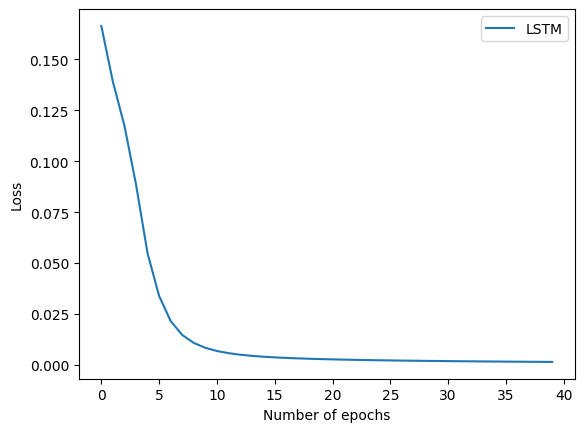

In [10]:


plt.plot(np.array(points1),label='LSTM')


plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot()
plt.legend()
plt.show()